#### Nhập dữ liệu và truy cập dữ liệu dạng bảng trong Pandas



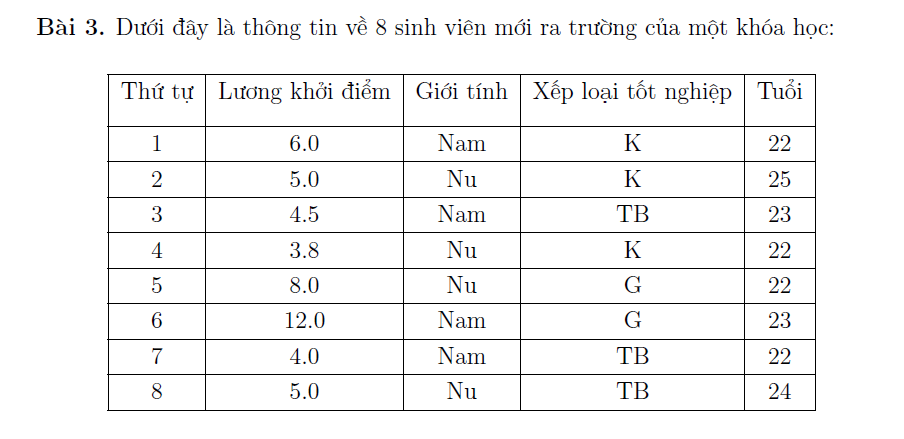

a. Nhập dữ liệu vào một data frame (đặt tên là sinh_vien) gồm các cột TT, luong,
gioi_tinh, tot_nghiep, tuoi.

b. Đưa ra dữ liệu về những sinh viên nữ.

c. Đưa ra dữ liệu về những sinh viên nam.

d. Đưa ra danh sách lương khởi điểm của nhóm sinh viên nữ.

e. Đưa ra danh sách tuổi của nhóm sinh viên nam.

f. Đưa ra danh sách những sinh viên có lương khởi điểm trên 6 triệu/tháng.

g. Cho biết các thông tin về những người có lương cao nhất trong danh sách.

h. Thêm vào danh sách một sinh viên nam tốt nghiệp xếp loại giỏi, lương khởi điểm
7.5 triệu nhưng không có thông tin về tuổi.

i. Thêm vào data frame trên một cột điểm khóa luận tốt nghiệp của các sinh viên
trên theo thứ tự như sau: 8, 7.5, 7, 7, 9, 9.5, 8, 8, 9.

j. Loại đi số liệu trống không trong data frame. Nhận xét.

In [1]:
#Nhập gói pandas và đặt bí danh là pd
import pandas as pd

In [98]:
#a. Nhập dữ liệu vào một data frame
#(đặt tên là sinh_vien) gồm các cột luong, gioi_tinh, tot_nghiep, tuoi.
#Nhập dữ liệu dạng từ điển:
data = {
    "luong": [6,5,4.5,3.8,8,12,4,5],
    "gioi_tinh": ["nam", "nu", "nam", "nu", "nu", "nam", "nam", "nu"],
    "tot_nghiep": ["k", "k", "tb", "k", "g", "g", "tb", "tb"],
    "tuoi": [22, 25, 23, 22, 22, 23, 22, 24],
}
#Chuyển thành dữ liệu dạng bảng trong pandas bằng hàm DataFrame:
df = pd.DataFrame(data)
df

,luong,gioi_tinh,tot_nghiep,tuoi
0,6.0,nam,k,22
1,5.0,nu,k,25
2,4.5,nam,tb,23
3,3.8,nu,k,22
4,8.0,nu,g,22
5,12.0,nam,g,23
6,4.0,nam,tb,22
7,5.0,nu,tb,24


In [99]:
#b. Đưa ra dữ liệu về những sinh viên nữ.
nu = df[df['gioi_tinh']=='nu']
#hoặc
nu = df.query('gioi_tinh=="nu"')
nu

,luong,gioi_tinh,tot_nghiep,tuoi
1,5.0,nu,k,25
3,3.8,nu,k,22
4,8.0,nu,g,22
7,5.0,nu,tb,24


In [100]:
#c. Đưa ra dữ liệu về những sinh viên nam.
nam = df[df['gioi_tinh']=='nam']
#hoặc
nam = df.query('gioi_tinh=="nam"')
nam

,luong,gioi_tinh,tot_nghiep,tuoi
0,6.0,nam,k,22
2,4.5,nam,tb,23
5,12.0,nam,g,23
6,4.0,nam,tb,22


In [101]:
#d. Đưa ra danh sách lương khởi điểm của nhóm sinh viên nữ.
luong_nu = nu['luong']
luong_nu

1    5.0
3    3.8
4    8.0
7    5.0
Name: luong, dtype: float64

In [102]:
#e. Đưa ra danh sách tuổi của nhóm sinh viên nam.
tuoi_nam = nam['tuoi']
tuoi_nam

0    22
2    23
5    23
6    22
Name: tuoi, dtype: int64

In [103]:
#f. Đưa ra danh sách những sinh viên có lương khởi điểm trên 6 triệu/tháng.
luong_tren_6 = df[df.luong > 6]
luong_tren_6
#hoặc
luong_tren_6 = df.query('luong > 6', inplace=False) #nếu để inplace=True, dữ liệu df bị thay đổi theo điều kiện lọc
luong_tren_6

,luong,gioi_tinh,tot_nghiep,tuoi
4,8.0,nu,g,22
5,12.0,nam,g,23


In [112]:
#g. Cho biết các thông tin về những người có lương cao nhất trong danh sách.
luong_cao = df[df.luong == max(df.luong)]
luong_cao

,luong,gioi_tinh,tot_nghiep,tuoi
5,12.0,nam,g,23


In [97]:
#h. Thêm vào danh sách một sinh viên nam tốt nghiệp xếp loại giỏi,
#lương khởi điểm 7.5 triệu nhưng không có thông tin về tuổi.
#số liệu trống có thể nhập là none hoặc np.nan
#Nếu nhập None theo dòng, khi hiển thị vẫn là None, nếu theo cột thì khi hiển thị chuyển thành NaN
dl_them = [7.5, 'nam', 'g', None] 
df1 = df
df1.loc[len(df.luong)] = dl_them
df1

,luong,gioi_tinh,tot_nghiep,tuoi
0,6.0,nam,k,22
1,5.0,nu,k,25
2,4.5,nam,tb,23
3,3.8,nu,k,22
4,8.0,nu,g,22
5,12.0,nam,g,23
6,4.0,nam,tb,22
7,5.0,nu,tb,24
8,7.5,nam,g,None
9,7.5,nam,g,NaN


In [48]:
#i. Thêm vào data frame trên một cột điểm khóa luận tốt nghiệp
#của các sinh viên trên theo thứ tự như sau:
#8, 7.5, 7, 7, 9, 9.5, 8, 8, 9.

df1['diem_khoa_luan'] = [8, 7.5, 7, 7, 9, 9.5, 8, 8, 9]
df1

,luong,gioi_tinh,tot_nghiep,tuoi,diem_khoa_luan
0,6.0,nam,k,22,8.0
1,5.0,nu,k,25,7.5
2,4.5,nam,tb,23,7.0
3,3.8,nu,k,22,7.0
4,8.0,nu,g,22,9.0
5,12.0,nam,g,23,9.5
6,4.0,nam,tb,22,8.0
7,5.0,nu,tb,24,8.0
8,7.5,nam,g,None,9.0


In [69]:
#câu i có thể làm như sau
diem_khoa_luan = [8, 7.5, 7, 7, 9, 9.5, 8, 8, 9]
df2 = df1
df2.insert(4, 'diem_khoa_luan', diem_khoa_luan)
df2

,luong,gioi_tinh,tot_nghiep,tuoi,diem_khoa_luan
0,6.0,nam,k,22,8.0
1,5.0,nu,k,25,7.5
2,4.5,nam,tb,23,7.0
3,3.8,nu,k,22,7.0
4,8.0,nu,g,22,9.0
5,12.0,nam,g,23,9.5
6,4.0,nam,tb,22,8.0
7,5.0,nu,tb,24,8.0
8,7.5,nam,g,None,9.0
